In [212]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)
from utils import *


class BetaAlphaBoundGenerator(SignalGenerator):
    def __init__(
        self,
        tmin: Union[int, float],
        tmax: Union[int, float],
        sfreq: int,
    ):
        if sfreq <= 65:
            raise ValueError('To make beta oscillations at least 65 Hz sampling frequency is needed')
        super().__init__(tmin, tmax, sfreq)

    def __call__(self, n_datasamples: int):
        for _ in range(n_datasamples):
            sig = sp.stats.zscore(random_walk(self._x)) +\
                sp.stats.zscore(
                    band_limited_noise(
                        0,
                        self._sfreq // 2,
                        self._n_samples,
                        samplespacing=1 / self._sfreq
                    )
            )
            sig[:sig.shape[0]//4] += 5*sp.stats.zscore(
                band_limited_noise(
                    15,
                    30,
                    self._n_samples,
                    samplespacing=1 / self._sfreq
                )[:sig.shape[0]//4]
            )
            sig[-sig.shape[0]//4:] += 5*sp.stats.zscore(
                band_limited_noise(
                    15,
                    30,
                    self._n_samples,
                    samplespacing=1 / self._sfreq
                )[:sig.shape[0]//4]
            )
            sig[sig.shape[0]//4:-sig.shape[0]//4] += 5*sp.stats.zscore(
                band_limited_noise(
                    8,
                    12,
                    self._n_samples,
                    samplespacing=1 / self._sfreq
                )[sig.shape[0]//4:-sig.shape[0]//4]
            )
            sig = sp.stats.zscore(sig)
            freqs = np.arange(1, self._sfreq // 2)
            cwtmatr = compute_morlet_cwt(sig, self._x, freqs)
            yield sig, cwtmatr

(512,) (127, 512)


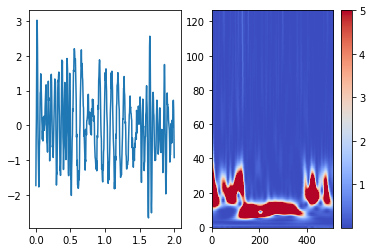

In [217]:
betagen = BetaAlphaBoundGenerator(0, 2, 256)

for i, (x, y) in enumerate(betagen(1)):

    print(x.shape, y.shape)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(betagen.times, x)

    mapable = ax2.imshow(
        # normal_rows(y),
        y,
        aspect='auto',
        origin='lower',
        cmap='coolwarm',
        vmax=5
    )
    plt.colorbar(mapable, ax=ax2)
    plt.show()
    break